<a href="https://colab.research.google.com/github/YoheiFukuhara/keras-for-beginner/blob/master/RNN01_simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純なRNNをKerasで実装
[「【Keras入門(1)】単純なディープラーニングモデル定義」で解説しています。](https://qiita.com/FukuharaYohei/items/25de4a0faf634ad34efc)
Kerasで単純なRNNを実装します。<br>
正弦関数のYの値を予測。

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlowに統合されたKerasを使用
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

## 前処理
訓練データ作成<br>
-4.9から4.9までの50要素の0.2間隔の等差数列：[-4.9, -4.7, ・・・・・・, 4.7, 4.9]の範囲での正弦関数

In [0]:
# -4.9から4.9までの50要素の等差数列(0.2間隔)
x_sin = np.linspace(-4.9, 4.9)
y_sin = np.sin(x_sin)

x_sin: [-4.9 -4.7 -4.5 -4.3 -4.1 -3.9 -3.7 -3.5 -3.3 -3.1 -2.9 -2.7 -2.5 -2.3
 -2.1 -1.9 -1.7 -1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5
  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7  2.9  3.1  3.3
  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9]
y_sin: [ 0.98245261  0.99992326  0.97753012  0.91616594  0.81827711  0.68776616
  0.52983614  0.35078323  0.15774569 -0.04158066 -0.23924933 -0.42737988
 -0.59847214 -0.74570521 -0.86320937 -0.94630009 -0.99166481 -0.99749499
 -0.96355819 -0.89120736 -0.78332691 -0.64421769 -0.47942554 -0.29552021
 -0.09983342  0.09983342  0.29552021  0.47942554  0.64421769  0.78332691
  0.89120736  0.96355819  0.99749499  0.99166481  0.94630009  0.86320937
  0.74570521  0.59847214  0.42737988  0.23924933  0.04158066 -0.15774569
 -0.35078323 -0.52983614 -0.68776616 -0.81827711 -0.91616594 -0.97753012
 -0.99992326 -0.98245261]


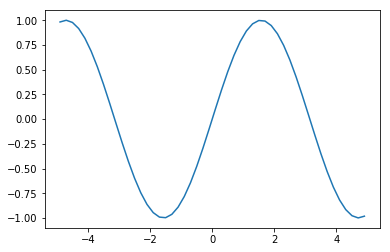

In [4]:
# グラフ表示
print('x_sin:', x_sin)
print('y_sin:', y_sin)
plt.plot(x_sin, y_sin)
plt.show()

正弦関数をRNNのモデルに入力する形に編集

In [0]:
NUM_RNN = 10  # 1時系列のデータ数
NUM_DATA = len(x_sin) - NUM_RNN # 今回は40(=50-10)

In [0]:
x = []
y = []

for i in range(NUM_DATA):
    x.append(y_sin[i:i+NUM_RNN])      # 説明変数
    y.append(y_sin[i+1:i+NUM_RNN+1])  # 正解データなので1ずらした値
    
else:
    x_train = np.array(x).reshape(NUM_DATA, NUM_RNN, 1) # 入力を(サンプル数、時系列の数、入力層のニューロン数)にする
    y_train = np.array(y).reshape(NUM_DATA, NUM_RNN, 1) # 説明変数(x_train)と同様のshape

## RNNモデル定義
Kerasを使ってRNNモデル定義

In [0]:
NUM_DIM = 8  # 中間層の次元数

In [8]:
model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(SimpleRNN(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")  # 誤差は二乗誤差、最適化アルゴリズムはSGD
model.summary()

W0728 04:13:07.843620 139875564459904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 8)             80        
_________________________________________________________________
dense (Dense)                (None, 10, 1)             9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=20, batch_size=8)

Epoch 1/20
40/40 [==============================] - 1s 18ms/sample - loss: 0.0625
Epoch 2/20
40/40 [==============================] - 0s 494us/sample - loss: 0.0420
Epoch 3/20
40/40 [==============================] - 0s 449us/sample - loss: 0.0374
Epoch 4/20
40/40 [==============================] - 0s 452us/sample - loss: 0.0350
Epoch 5/20
40/40 [==============================] - 0s 398us/sample - loss: 0.0336
Epoch 6/20
40/40 [==============================] - 0s 413us/sample - loss: 0.0325
Epoch 7/20
40/40 [==============================] - 0s 601us/sample - loss: 0.0311
Epoch 8/20
40/40 [==============================] - 0s 571us/sample - loss: 0.0301
Epoch 9/20
40/40 [==============================] - 0s 460us/sample - loss: 0.0293
Epoch 10/20
40/40 [==============================] - 0s 446us/sample - loss: 0.0283
Epoch 11/20
40/40 [==============================] - 0s 542us/sample - loss: 0.0276
Epoch 12/20
40/40 [==============================] - 0s 506us/sample - loss: 0.0267
Ep

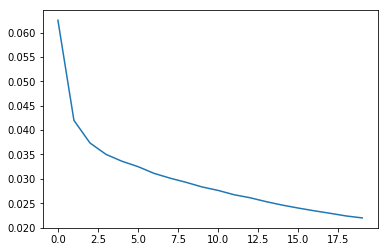

In [10]:
loss = history.history['loss']

plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

In [11]:
# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
print(x_test.shape)

(10,)


In [0]:
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

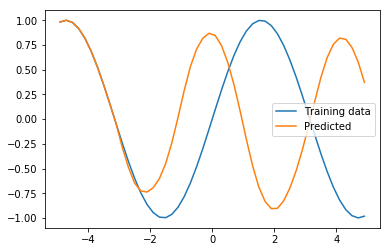

In [13]:
# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

In [14]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.189
botocore==1.12.189
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.12
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.3
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy